In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms

In [2]:
# df = pd.read_csv("Data_Entry_2017_v2020.csv")

In [3]:
# # only keep image index and finding labels columns
# df = df[['Image Index', 'Finding Labels']]

# # only contains first 4999 images
# df = df[0:4999]

In [4]:
# # convert no finding to 0, all other pathologies to 1
# df = df.replace("No Finding", 0)
# df.loc[df['Finding Labels'] != 0, 'Finding Labels']= 1

In [5]:
# train_df = df[0:4500]
# test_df = df[4500:].reset_index(drop=True)

# train_df.to_csv("train_imgs.csv")
# test_df.to_csv("test_imgs.csv")

sort images in folders "train" and "test" to "train/0", "train/1" and "test/0", "test/1" depending on the pathology classification of each image

In [6]:
# import os
# import shutil
# pwd = os.getcwd()

# os.chdir("train")

# for index, row in train_df.iterrows():
#     if row[1] == 0:
#         shutil.move(row[0], "./0")
#     else:
#         shutil.move(row[0], "./1")

# os.chdir(pwd)
# os.chdir("test")

# for index, row in test_df.iterrows():
#     if row[1] == 0:
#         shutil.move(row[0], "./0")
#     else:
#         shutil.move(row[0], "./1")
# os.chdir(pwd)

Create standardized test data

In [7]:
from skimage.util import random_noise

class GaussianNoise():
    """
    Torchvision transform to add Gaussian noise. 

    Use it as you would a regular torchvision transform.
    """
    def __init__(self, mean=0, var=0.01):
        """

        Args:
            mean: mean of the Gaussian noise
            var: variance of Gaussian noise
        """
        self.mean = mean
        self.var = var
        
    def __call__(self, tensor):
        return torch.tensor(random_noise(tensor, mode='gaussian', mean=self.mean, var=self.var))
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)
    
gaussiannoise = GaussianNoise()

In [8]:
img_size = 128
totensor = transforms.ToTensor()
resize = transforms.Resize((img_size, img_size))
grayscale = transforms.Grayscale(num_output_channels=1)
transforms_ = transforms.Compose([totensor,
                                grayscale,
                                resize])

test_data = torchvision.datasets.ImageFolder("test", transform=transforms_)

In [9]:
test_data_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=False) # for test set retrieve the entire batch (look at batch_size arg)
test_batch = next(iter(test_data_loader)) # retrieve full batch
test_gt = test_batch[0]

torch.save(test_gt, "test_clean.pt")

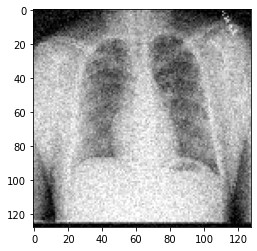

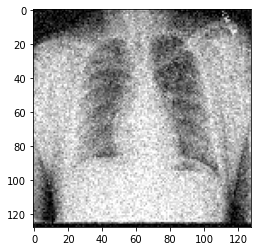

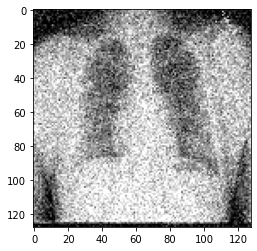

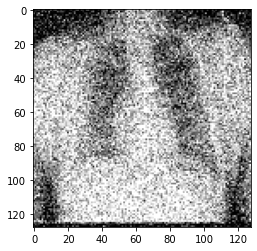

In [20]:
for var in [0.005, 0.01, 0.025, 0.05]:
    gaussiannoise = GaussianNoise(var=var)
    noisy = gaussiannoise(test_gt)
    plt.imshow(noisy[0].squeeze(), cmap='gray')
    plt.show()
    
    torch.save(noisy,"test_noisy_var_{:.3f}.pt".format(var))

In [22]:
label = test_batch[1]
torch.save(label, 'label.pt')
print(label.shape)

torch.Size([499])
